<a href="https://colab.research.google.com/github/ayushksingh28/finance-llms/blob/main/Analysing_Fed_Speech_with_S%26P_500_index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install git+https://github.com/openai/whisper.git -q

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 MB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 75.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 19.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 71.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 60.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 97.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [18]:
!pip install torch==2.1.0 -q
!pip install cohere

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.2/89.2 MB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.5/20.5 MB 83.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
openai-whisper 20230918 requires triton==2.0.0, but you have triton 2.1.0 which is incompatible.


In [2]:
!nvidia-smi -L

GPU 0: Tesla V100-SXM2-16GB (UUID: GPU-eb67cc50-852d-4bcb-f0c4-7aa7bc8cd242)


In [3]:
!pip install pytube -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 2.2 MB/s eta 0:00:00


In [4]:
import whisper
from pytube import YouTube

In [5]:
model = whisper.load_model('base')

100%|███████████████████████████████████████| 139M/139M [00:04<00:00, 36.0MiB/s]


In [6]:
youtube_video_url = "https://www.youtube.com/watch?v=NT2H9iyd-ms"
youtube_video = YouTube(youtube_video_url)

In [7]:
youtube_video.title

'WATCH LIVE | Fed Chair Powell Discusses Latest Fed Rate Hike'

In [8]:
dir(youtube_video)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_age_restricted',
 '_author',
 '_embed_html',
 '_fmt_streams',
 '_initial_data',
 '_js',
 '_js_url',
 '_metadata',
 '_player_config_args',
 '_publish_date',
 '_title',
 '_vid_info',
 '_watch_html',
 'age_restricted',
 'allow_oauth_cache',
 'author',
 'bypass_age_gate',
 'caption_tracks',
 'captions',
 'channel_id',
 'channel_url',
 'check_availability',
 'description',
 'embed_html',
 'embed_url',
 'fmt_streams',
 'from_id',
 'initial_data',
 'js',
 'js_url',
 'keywords',
 'length',
 'metadata',
 'publish_date',
 'rating',
 'register_on_complete_callback',
 'register_on_progress_callback',
 'stream_monostate',
 'streamin

In [9]:
youtube_video.streams

[<Stream: itag="17" mime_type="video/3gpp" res="144p" fps="7fps" vcodec="mp4v.20.3" acodec="mp4a.40.2" progressive="True" type="video">, <Stream: itag="18" mime_type="video/mp4" res="360p" fps="30fps" vcodec="avc1.42001E" acodec="mp4a.40.2" progressive="True" type="video">, <Stream: itag="22" mime_type="video/mp4" res="720p" fps="30fps" vcodec="avc1.64001F" acodec="mp4a.40.2" progressive="True" type="video">, <Stream: itag="137" mime_type="video/mp4" res="1080p" fps="30fps" vcodec="avc1.640028" progressive="False" type="video">, <Stream: itag="248" mime_type="video/webm" res="1080p" fps="30fps" vcodec="vp9" progressive="False" type="video">, <Stream: itag="136" mime_type="video/mp4" res="720p" fps="30fps" vcodec="avc1.64001f" progressive="False" type="video">, <Stream: itag="247" mime_type="video/webm" res="720p" fps="30fps" vcodec="vp9" progressive="False" type="video">, <Stream: itag="135" mime_type="video/mp4" res="480p" fps="30fps" vcodec="avc1.4d401f" progressive="False" type="vid

In [11]:
for stream in youtube_video.streams:
  print(stream)

<Stream: itag="17" mime_type="video/3gpp" res="144p" fps="7fps" vcodec="mp4v.20.3" acodec="mp4a.40.2" progressive="True" type="video">
<Stream: itag="18" mime_type="video/mp4" res="360p" fps="30fps" vcodec="avc1.42001E" acodec="mp4a.40.2" progressive="True" type="video">
<Stream: itag="22" mime_type="video/mp4" res="720p" fps="30fps" vcodec="avc1.64001F" acodec="mp4a.40.2" progressive="True" type="video">
<Stream: itag="137" mime_type="video/mp4" res="1080p" fps="30fps" vcodec="avc1.640028" progressive="False" type="video">
<Stream: itag="248" mime_type="video/webm" res="1080p" fps="30fps" vcodec="vp9" progressive="False" type="video">
<Stream: itag="136" mime_type="video/mp4" res="720p" fps="30fps" vcodec="avc1.64001f" progressive="False" type="video">
<Stream: itag="247" mime_type="video/webm" res="720p" fps="30fps" vcodec="vp9" progressive="False" type="video">
<Stream: itag="135" mime_type="video/mp4" res="480p" fps="30fps" vcodec="avc1.4d401f" progressive="False" type="video">
<St

In [14]:
streams = youtube_video.streams.filter(only_audio = True)
streams

[<Stream: itag="139" mime_type="audio/mp4" abr="48kbps" acodec="mp4a.40.5" progressive="False" type="audio">, <Stream: itag="140" mime_type="audio/mp4" abr="128kbps" acodec="mp4a.40.2" progressive="False" type="audio">, <Stream: itag="249" mime_type="audio/webm" abr="50kbps" acodec="opus" progressive="False" type="audio">, <Stream: itag="250" mime_type="audio/webm" abr="70kbps" acodec="opus" progressive="False" type="audio">, <Stream: itag="251" mime_type="audio/webm" abr="160kbps" acodec="opus" progressive="False" type="audio">]

In [16]:
stream = streams.first()
stream

<Stream: itag="139" mime_type="audio/mp4" abr="48kbps" acodec="mp4a.40.5" progressive="False" type="audio">

In [19]:
stream.download(filename = 'fed_meeting.mp4')

'/content/fed_meeting.mp4'

In [20]:
!ffmpeg -ss 378 -i fed_meeting.mp4 -t 2715 fed_meeting_trimmed.mp4

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [21]:
import datetime

# save a timestamp before transcription
t1 = datetime.datetime.now()
print(f"started at {t1}")

# do the transcription
output = model.transcribe("fed_meeting_trimmed.mp4")

# show time elapsed after transcription is complete.
t2 = datetime.datetime.now()
print(f"ended at {t2}")
print(f"time elapsed: {t2 - t1}")

started at 2023-10-29 08:47:49.206066
ended at 2023-10-29 08:49:49.789797
time elapsed: 0:02:00.583731


In [22]:
output

{'text': " Good afternoon. My colleagues and I are strongly committed to bringing inflation back down to our 2% goal. We have both the tools that we need and the resolve it will take to restore price stability on behalf of American families and businesses. Price stability is the responsibility of the Federal Reserve and serves as the bedrock of our economy. Without price stability, the economy does not work for anyone. In particular, without price stability, we will not achieve a sustained period of strong labor market conditions that benefit all. Today, the FOMC raised our policy interest rate by 75 basis points and we continue to anticipate that ongoing increases will be appropriate. We are moving our policy stance purposefully to a level that will be sufficiently restrictive to return inflation to 2%. In addition, we are continuing the process of significantly reducing the size of our balance sheet. Restoring price stability will likely require maintaining a restrictive stance of po

In [23]:
output["text"]

" Good afternoon. My colleagues and I are strongly committed to bringing inflation back down to our 2% goal. We have both the tools that we need and the resolve it will take to restore price stability on behalf of American families and businesses. Price stability is the responsibility of the Federal Reserve and serves as the bedrock of our economy. Without price stability, the economy does not work for anyone. In particular, without price stability, we will not achieve a sustained period of strong labor market conditions that benefit all. Today, the FOMC raised our policy interest rate by 75 basis points and we continue to anticipate that ongoing increases will be appropriate. We are moving our policy stance purposefully to a level that will be sufficiently restrictive to return inflation to 2%. In addition, we are continuing the process of significantly reducing the size of our balance sheet. Restoring price stability will likely require maintaining a restrictive stance of policy for 

In [24]:
for segment in output['segments']:
  print(segment)
  second = int(segment['start'])
  second = second - (second % 5)
  print(second)

{'id': 0, 'seek': 0, 'start': 0.0, 'end': 8.0, 'text': ' Good afternoon. My colleagues and I are strongly committed to bringing inflation back down to our 2% goal.', 'tokens': [50364, 2205, 6499, 13, 1222, 7734, 293, 286, 366, 10613, 7784, 281, 5062, 15860, 646, 760, 281, 527, 568, 4, 3387, 13, 50764], 'temperature': 0.0, 'avg_logprob': -0.14400711575069944, 'compression_ratio': 1.5818181818181818, 'no_speech_prob': 0.0643351599574089}
0
{'id': 1, 'seek': 0, 'start': 8.0, 'end': 16.0, 'text': ' We have both the tools that we need and the resolve it will take to restore price stability on behalf of American families and businesses.', 'tokens': [50764, 492, 362, 1293, 264, 3873, 300, 321, 643, 293, 264, 14151, 309, 486, 747, 281, 15227, 3218, 11826, 322, 9490, 295, 2665, 4466, 293, 6011, 13, 51164], 'temperature': 0.0, 'avg_logprob': -0.14400711575069944, 'compression_ratio': 1.5818181818181818, 'no_speech_prob': 0.0643351599574089}
5
{'id': 2, 'seek': 0, 'start': 16.0, 'end': 22.0, 'tex

##Combining Speech Data with Price Data

In [25]:
import pandas as pd
import numpy as np

In [26]:
df = pd.read_csv("/content/spy.csv")

In [27]:
df

,date,open,high,low,close,volume,average,barCount
0,2022-11-02 14:31:15,387.13,387.17,386.75,386.83,82173.0,386.884,444
1,2022-11-02 14:31:20,386.80,387.00,386.80,386.91,38918.0,386.913,234
2,2022-11-02 14:31:25,386.94,386.96,386.55,386.64,48165.0,386.749,232
3,2022-11-02 14:31:30,386.64,386.95,386.59,386.86,30688.0,386.760,190
4,2022-11-02 14:31:35,386.91,386.92,386.81,386.87,22270.0,386.862,130
...,...,...,...,...,...,...,...,...
538,2022-11-02 15:16:05,380.30,380.48,380.30,380.39,40401.0,380.418,265
539,2022-11-02 15:16:10,380.37,380.49,380.24,380.45,40709.0,380.378,221
540,2022-11-02 15:16:15,380.45,380.48,380.38,380.39,12465.0,380.425,69
541,2022-11-02 15:16:20,380.38,380.38,380.28,380.36,24107.0,380.324,139


In [29]:
for segment in output['segments']:
   second = int(segment['start'])
   second = second - (second % 5)
   df.loc[second / 5, 'text'] = segment['text']

df

,date,open,high,low,close,volume,average,barCount,text
0,2022-11-02 14:31:15,387.13,387.17,386.75,386.83,82173.0,386.884,444,Good afternoon. My colleagues and I are stron...
1,2022-11-02 14:31:20,386.80,387.00,386.80,386.91,38918.0,386.913,234,We have both the tools that we need and the r...
2,2022-11-02 14:31:25,386.94,386.96,386.55,386.64,48165.0,386.749,232,NaN
3,2022-11-02 14:31:30,386.64,386.95,386.59,386.86,30688.0,386.760,190,Price stability is the responsibility of the ...
4,2022-11-02 14:31:35,386.91,386.92,386.81,386.87,22270.0,386.862,130,"Without price stability, the economy does not..."
...,...,...,...,...,...,...,...,...,...
538,2022-11-02 15:16:05,380.30,380.48,380.30,380.39,40401.0,380.418,265,"At the same time, now you see services inflat..."
539,2022-11-02 15:16:10,380.37,380.49,380.24,380.45,40709.0,380.378,221,And I just think that the inflation picture h...
540,2022-11-02 15:16:15,380.45,380.48,380.38,380.39,12465.0,380.425,69,NaN
541,2022-11-02 15:16:20,380.38,380.38,380.28,380.36,24107.0,380.324,139,That means that we have to have policy be mor...


In [30]:
df['percent'] = ((df['close'] - df['open']) / df['open']) * 100

In [31]:
df

,date,open,high,low,close,volume,average,barCount,text,percent
0,2022-11-02 14:31:15,387.13,387.17,386.75,386.83,82173.0,386.884,444,Good afternoon. My colleagues and I are stron...,-0.077493
1,2022-11-02 14:31:20,386.80,387.00,386.80,386.91,38918.0,386.913,234,We have both the tools that we need and the r...,0.028438
2,2022-11-02 14:31:25,386.94,386.96,386.55,386.64,48165.0,386.749,232,NaN,-0.077531
3,2022-11-02 14:31:30,386.64,386.95,386.59,386.86,30688.0,386.760,190,Price stability is the responsibility of the ...,0.056900
4,2022-11-02 14:31:35,386.91,386.92,386.81,386.87,22270.0,386.862,130,"Without price stability, the economy does not...",-0.010338
...,...,...,...,...,...,...,...,...,...,...
538,2022-11-02 15:16:05,380.30,380.48,380.30,380.39,40401.0,380.418,265,"At the same time, now you see services inflat...",0.023666
539,2022-11-02 15:16:10,380.37,380.49,380.24,380.45,40709.0,380.378,221,And I just think that the inflation picture h...,0.021032
540,2022-11-02 15:16:15,380.45,380.48,380.38,380.39,12465.0,380.425,69,NaN,-0.015771
541,2022-11-02 15:16:20,380.38,380.38,380.28,380.36,24107.0,380.324,139,That means that we have to have policy be mor...,-0.005258


In [32]:
big_downmoves = df[df["percent"] < 0.2]

In [33]:
big_downmoves

,date,open,high,low,close,volume,average,barCount,text,percent
0,2022-11-02 14:31:15,387.13,387.17,386.75,386.83,82173.0,386.884,444,Good afternoon. My colleagues and I are stron...,-0.077493
1,2022-11-02 14:31:20,386.80,387.00,386.80,386.91,38918.0,386.913,234,We have both the tools that we need and the r...,0.028438
2,2022-11-02 14:31:25,386.94,386.96,386.55,386.64,48165.0,386.749,232,NaN,-0.077531
3,2022-11-02 14:31:30,386.64,386.95,386.59,386.86,30688.0,386.760,190,Price stability is the responsibility of the ...,0.056900
4,2022-11-02 14:31:35,386.91,386.92,386.81,386.87,22270.0,386.862,130,"Without price stability, the economy does not...",-0.010338
...,...,...,...,...,...,...,...,...,...,...
538,2022-11-02 15:16:05,380.30,380.48,380.30,380.39,40401.0,380.418,265,"At the same time, now you see services inflat...",0.023666
539,2022-11-02 15:16:10,380.37,380.49,380.24,380.45,40709.0,380.378,221,And I just think that the inflation picture h...,0.021032
540,2022-11-02 15:16:15,380.45,380.48,380.38,380.39,12465.0,380.425,69,NaN,-0.015771
541,2022-11-02 15:16:20,380.38,380.38,380.28,380.36,24107.0,380.324,139,That means that we have to have policy be mor...,-0.005258


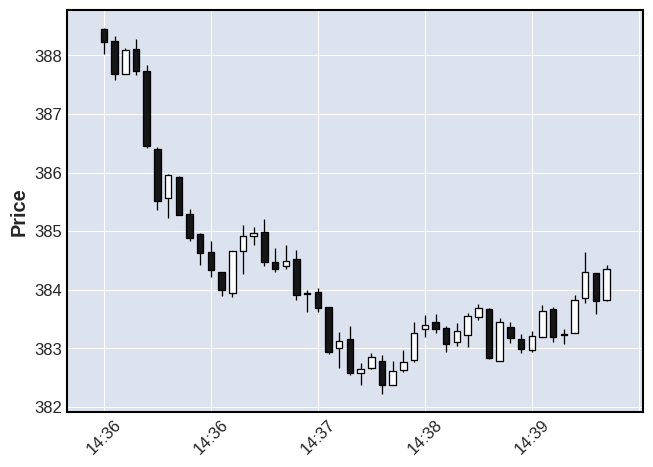

In [35]:
!pip install mplfinance -q
import mplfinance as mpf

df = df
df.index = pd.DatetimeIndex(df['date'])

mpf.plot(df['2022-11-02 14:36':'2022-11-02 14:39'],type='candle')

As you can see there was a major downward move, we see that there was something that was said before 14:36 that led to the downfall of S&P 500 in a very short period of the followup time.


In [36]:
df[50:70]

,date,open,high,low,close,volume,average,barCount,text,percent
date,,,,,,,,,,
2022-11-02 14:35:25,2022-11-02 14:35:25,386.91,387.24,386.88,387.19,24625.0,387.125,181,And we are continuing the process of signific...,0.072368
2022-11-02 14:35:30,2022-11-02 14:35:30,387.21,387.81,387.20,387.77,97840.0,387.514,688,NaN,0.144624
2022-11-02 14:35:35,2022-11-02 14:35:35,387.73,387.93,387.63,387.65,95192.0,387.808,475,"With today's action, we've raised interest ra...",-0.020633
2022-11-02 14:35:40,2022-11-02 14:35:40,387.64,387.76,387.52,387.55,30898.0,387.617,162,We anticipate that ongoing increases in the t...,-0.023217
2022-11-02 14:35:45,2022-11-02 14:35:45,387.56,388.19,387.56,388.16,148005.0,388.015,823,NaN,0.154815
2022-11-02 14:35:50,2022-11-02 14:35:50,388.15,388.63,388.14,388.22,154486.0,388.446,883,NaN,0.018034
2022-11-02 14:35:55,2022-11-02 14:35:55,388.25,388.46,388.02,388.42,51105.0,388.253,320,Financial conditions have tightened significa...,0.043786
2022-11-02 14:36:00,2022-11-02 14:36:00,388.46,388.47,388.02,388.23,61893.0,388.204,368,NaN,-0.059208
2022-11-02 14:36:05,2022-11-02 14:36:05,388.24,388.34,387.58,387.69,93311.0,387.940,520,"It will take time, however, for the full effe...",-0.141665
